In [29]:
pip install pillow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [30]:
from PIL import Image
import numpy as np

In [31]:
def adjust_brightness(image_path, output_path, factor):
    # Abre la imagen
    image = Image.open(image_path)
    
    # Convierte la imagen a una matriz NumPy (array)
    image_array = np.array(image)
    
    adjusted_image = image_array * factor
    
    # Multiplica la matriz por el escalar
    # Nos aseguramos de que el resultado se mantenga dentro del rango [0, 255]
    adjusted_array = np.clip(adjusted_image, 0, 255).astype(np.uint8)
    
    # Convierte la matriz ajustada de nuevo a una imagen
    adjusted_image = Image.fromarray(adjusted_array)
    
    # Guarda la imagen ajustada
    adjusted_image.save(output_path)
    return adjusted_image

In [32]:
# Ejemplo de uso
# adjust_brightness('input_image.jpg', 'brightened_image.jpg', 1.5) 
AI_0 = adjust_brightness('BebeEnPañalesWhat.jpg', 'brightened_image_50.jpg', 0.75) 
AI_50 = adjust_brightness('BebeEnPañalesWhat.jpg', 'brightened_image_50.jpg', 1.5) 
AI_25 = adjust_brightness('BebeEnPañalesWhat.jpg', 'brightened_image_25.jpg', 1.25) 

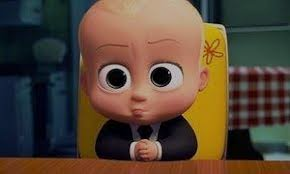

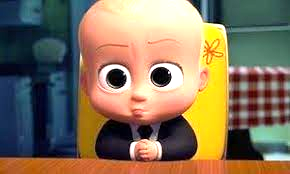

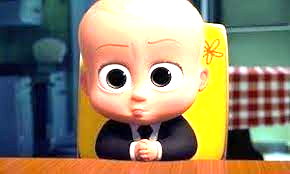

In [33]:
display(AI_0)
display(AI_25)
display(AI_50)

In [56]:
from PIL import Image
import numpy as np

def scale_image(image_path, scale_x, scale_y):
    # Abre la imagen
    image = Image.open(image_path)
    
    # Convierte la imagen a un array de numpy
    image_array = np.array(image)
    
    # Obtén las dimensiones de la imagen original
    original_height, original_width = image_array.shape[:2]
    
    # Calcula las nuevas dimensiones
    new_width = int(original_width * scale_x)
    new_height = int(original_height * scale_y)
    
    # Crea una nueva imagen con las nuevas dimensiones
    #new_image = image.resize((new_width, new_height), Image.ANTIALIAS) #Renombrada
    new_image = image.resize((new_width, new_height), Image.Resampling.LANCZOS)    
    
    return new_image

In [57]:
# Ruta de la imagen original
image_path = 'BebeEnPañalesWhat.jpg'

# Factores de escala para las dimensiones x e y
scale_x = 1.5  # Aumentar el ancho en un 50%
scale_y = 1.0  # Mantener la altura igual

# Escalar la imagen
new_image = scale_image(image_path, scale_x, scale_y)

# Guarda la nueva imagen
new_image.save('bebe_resized.jpg')

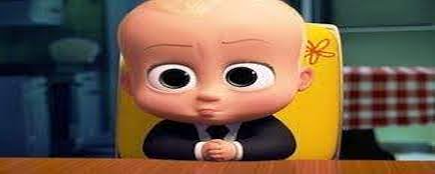

In [58]:
display(new_image)

In [59]:
from PIL import Image
import numpy as np

def scale_image_array(image_path, scale_x, scale_y):
    # Abre la imagen
    image = Image.open(image_path)
    
    # Convierte la imagen a un array de numpy
    image_array = np.array(image)
    
    # Obtén las dimensiones de la imagen original
    original_height, original_width, channels = image_array.shape
    
    # Calcula las nuevas dimensiones
    new_width = int(original_width * scale_x)
    new_height = int(original_height * scale_y)
    
    # Crear una matriz de ceros con las nuevas dimensiones
    new_image_array = np.zeros((new_height, new_width, channels), dtype=np.uint8)
    
    # Redimensionar manualmente la imagen
    for i in range(new_height):
        for j in range(new_width):
            new_i = min(int(i / scale_y), original_height - 1)
            new_j = min(int(j / scale_x), original_width - 1)
            new_image_array[i, j] = image_array[new_i, new_j]
    
    # Convierte el array de vuelta a una imagen
    new_image = Image.fromarray(new_image_array)
    
    return new_image

In [60]:
# Ruta de la imagen original
image_path = 'BebeEnPañalesWhat.jpg'

# Factores de escala para las dimensiones x e y
scale_x = 1.5  # Aumentar el ancho en un 50%
scale_y = 1.0  # Mantener la altura igual

# Escalar la imagen
new_image_array = scale_image_array(image_path, scale_x, scale_y)

# Guarda la nueva imagen
new_image_array.save('bebe_resized2.jpg')

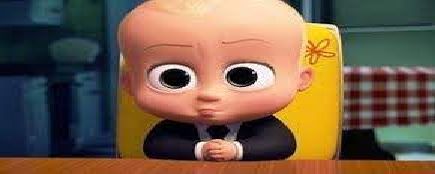

In [61]:
display(new_image_array)